In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step(state, action):
    new_state = max(min(state+action, 999), 0)
    if new_state <= 0:
        return new_state, -1, True
    elif new_state >= 999:
        return new_state, 1, True
    else:
        return new_state, 0, False

def policy():
    return np.random.randint(1,101)*np.random.choice([-1,1])

def reward(state):
    if state == 0:
        return -1
    elif state == 999:
        return 1
    else:
        return 0

In [3]:
Delta = 1
theta = 1e-3

V = np.zeros(1000)
V[0], V[-1] = -1, 1

while Delta > theta:
    Delta = 0
    for s in range(1,999):
        v = V[s]
        prob = np.ones(201)*(1./200.)
        new_V = np.zeros(201)
        for a in range(-100, 101):
            if a == 0:
                new_V[a+100] = 0
            else:
                new_s = max(min(s+a, 999), 0)
                new_V[a+100] = V[new_s]
        V[s] = new_V.dot(prob)
        Delta = max(Delta, abs(v - V[s]))

# print(V)



Text(0.5, 1.0, 'true value function')

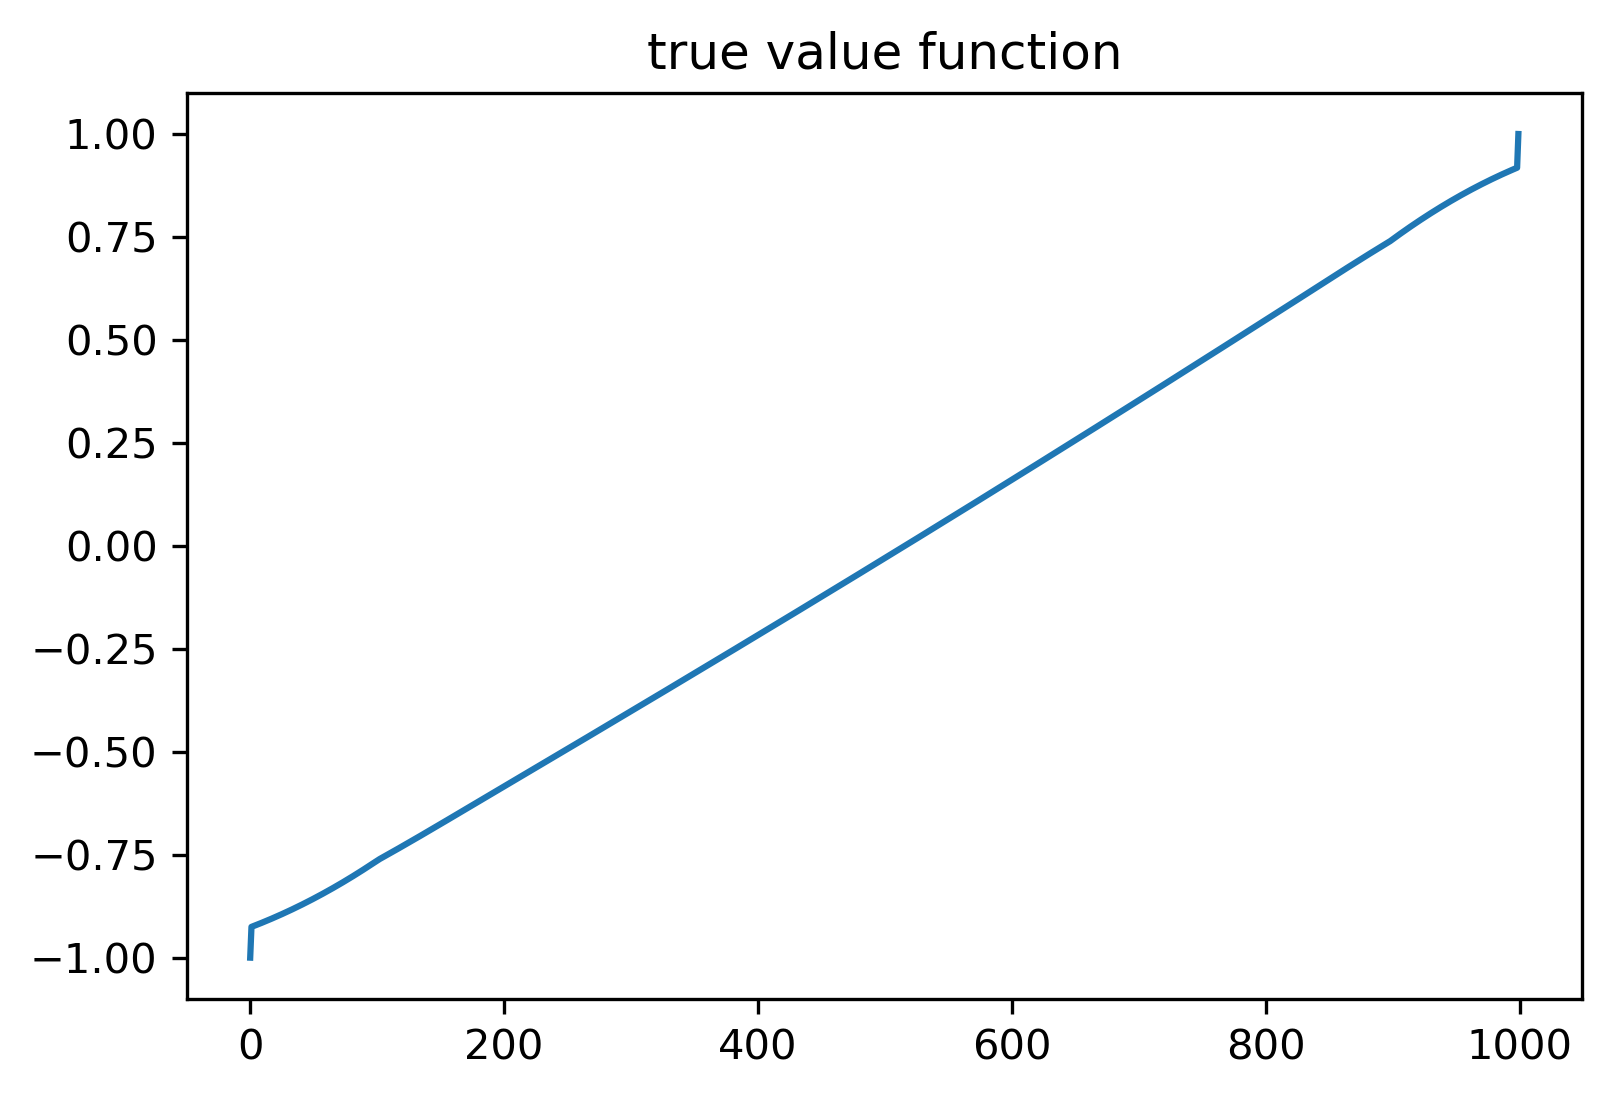

In [71]:
fig, ax = plt.subplots(dpi=300)
ax.plot(V)
ax.set_ylim([-1.1,1.1])
ax.set_title('true value function')

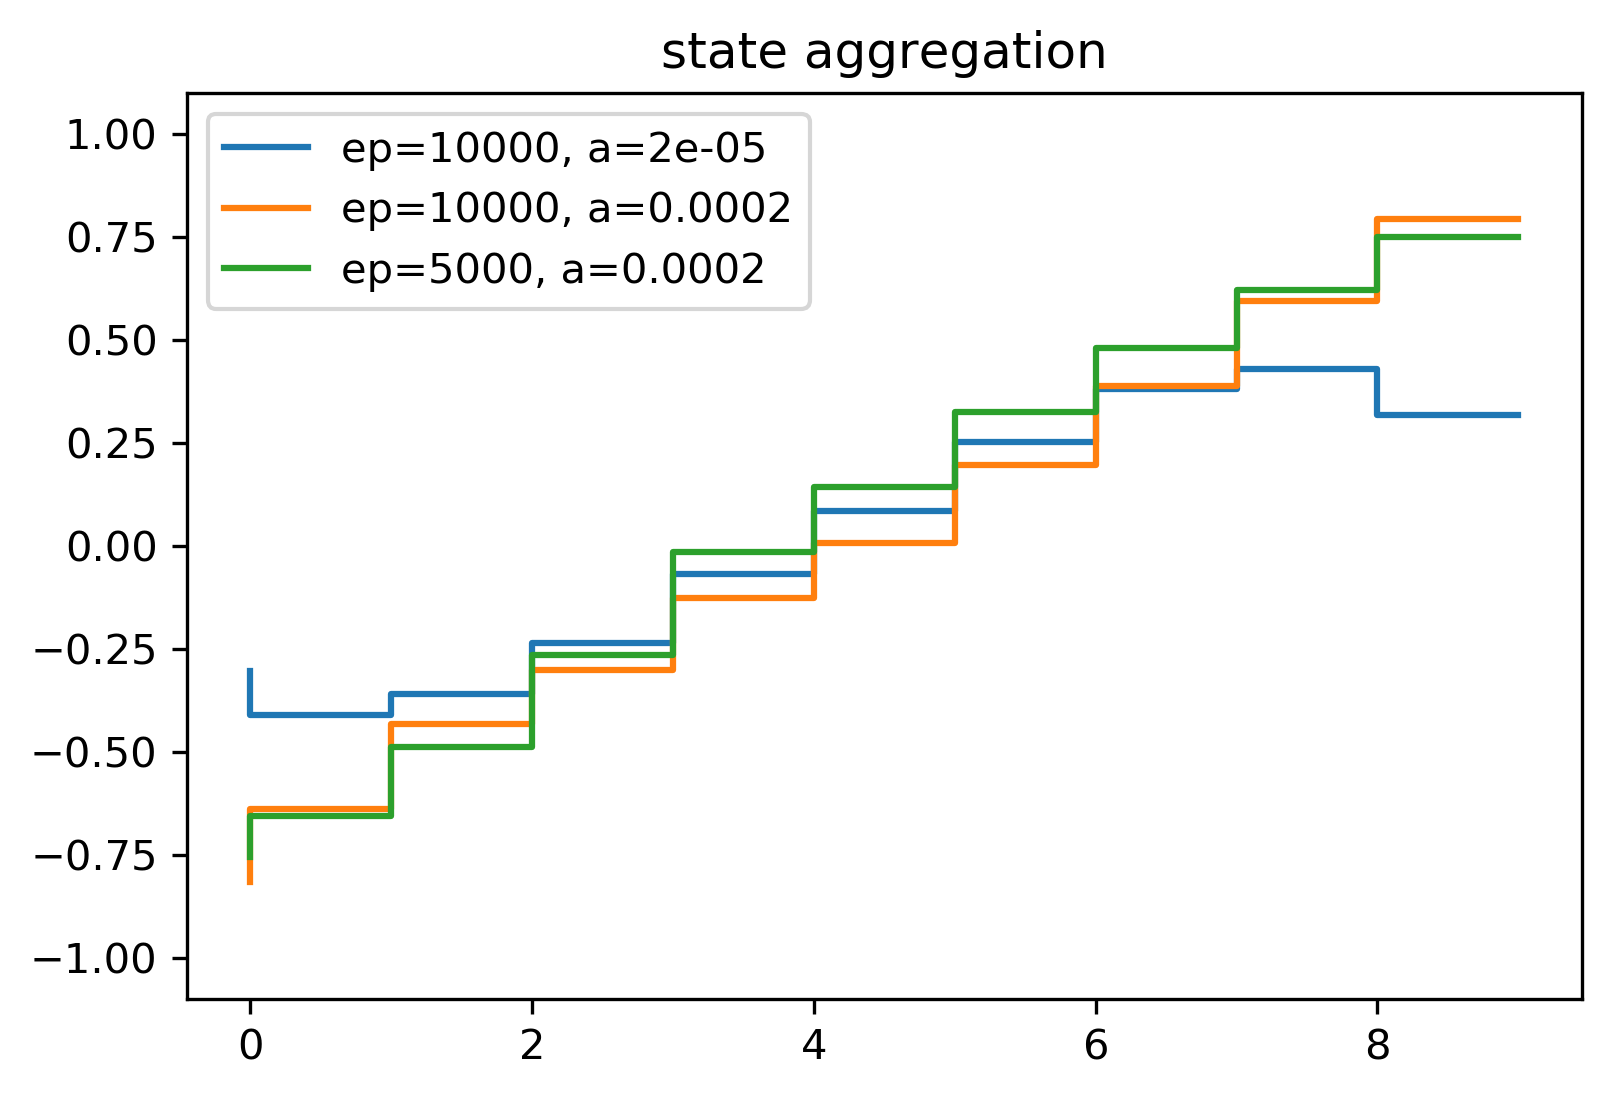

In [72]:
episode = 10000
alpha = 2e-5

V_mc = np.zeros(10)
for i in range(episode):
    s = 499
    terminal = False
    # r_history = []
    s_history = []

    while not terminal:
        a = policy()
        new_s, r, terminal = step(s, a)
        # r_history.append(r)
        s_history.append(s//100)
        s = new_s
    
    for s in s_history:
        V_mc[s] += alpha*( r - V_mc[s] )


fig, ax = plt.subplots(dpi=300)
ax.step(np.arange(len(V_mc)), V_mc, label=f'ep={episode}, a={alpha}')


episode = 10000
alpha = 2e-4

V_mc = np.zeros(10)
for i in range(episode):
    s = 499
    terminal = False
    # r_history = []
    s_history = []

    while not terminal:
        a = policy()
        new_s, r, terminal = step(s, a)
        # r_history.append(r)
        s_history.append(s//100)
        s = new_s
    
    for s in s_history:
        V_mc[s] += alpha*( r - V_mc[s] )

ax.step(np.arange(len(V_mc)), V_mc, label=f'ep={episode}, a={alpha}')

episode = 5000
alpha = 2e-4

V_mc = np.zeros(10)
for i in range(episode):
    s = 499
    terminal = False
    # r_history = []
    s_history = []

    while not terminal:
        a = policy()
        new_s, r, terminal = step(s, a)
        # r_history.append(r)
        s_history.append(s//100)
        s = new_s
    
    for s in s_history:
        V_mc[s] += alpha*( r - V_mc[s] )

ax.step(np.arange(len(V_mc)), V_mc, label=f'ep={episode}, a={alpha}')
ax.set_title('state aggregation')
ax.set_ylim([-1.1,1.1])
ax.legend()

Text(0.5, 1.0, 'polynomial basis')

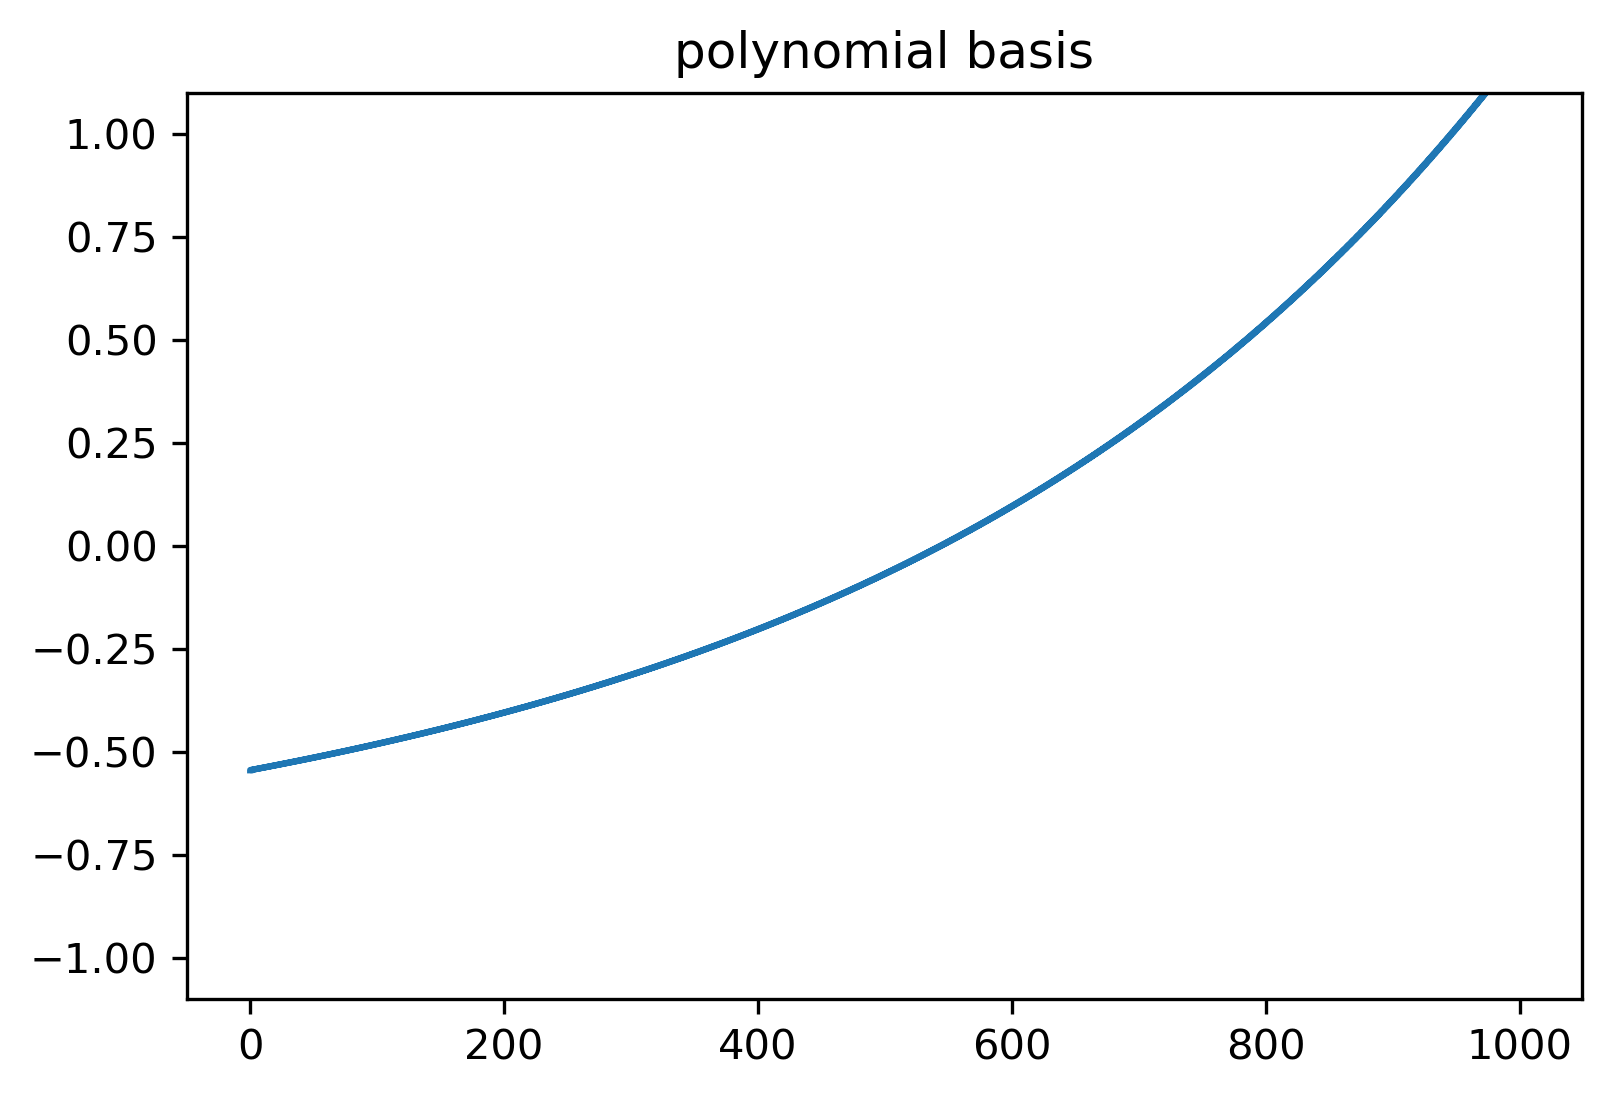

In [73]:
episode = 5000
alpha = 1e-4
N = 5

def poly(w, s):
    return np.array( [ np.power(s, i) for i in range(N+1) ] ).dot(w)

def grad_poly(s):
    return np.array([ np.power(s, i) for i in range(N+1) ])


w = np.zeros(N+1)
for i in range(episode):
    s = 499
    terminal = False
    # r_history = []
    s_history = []

    while not terminal:
        a = policy()
        new_s, r, terminal = step(s, a)
        s_history.append(s/1000.)
        s = new_s
    
    for s in s_history:
        w += alpha*( r - poly(w, s) )*grad_poly(s)

fig, ax = plt.subplots(dpi=300)
ax.step(np.arange(1000), [poly(w, s/1000.) for s in range(1000)], label=f'ep={episode}, a={alpha}')
ax.set_ylim([-1.1,1.1])
ax.set_title('polynomial basis')

Text(0.5, 1.0, 'Fourier basis')

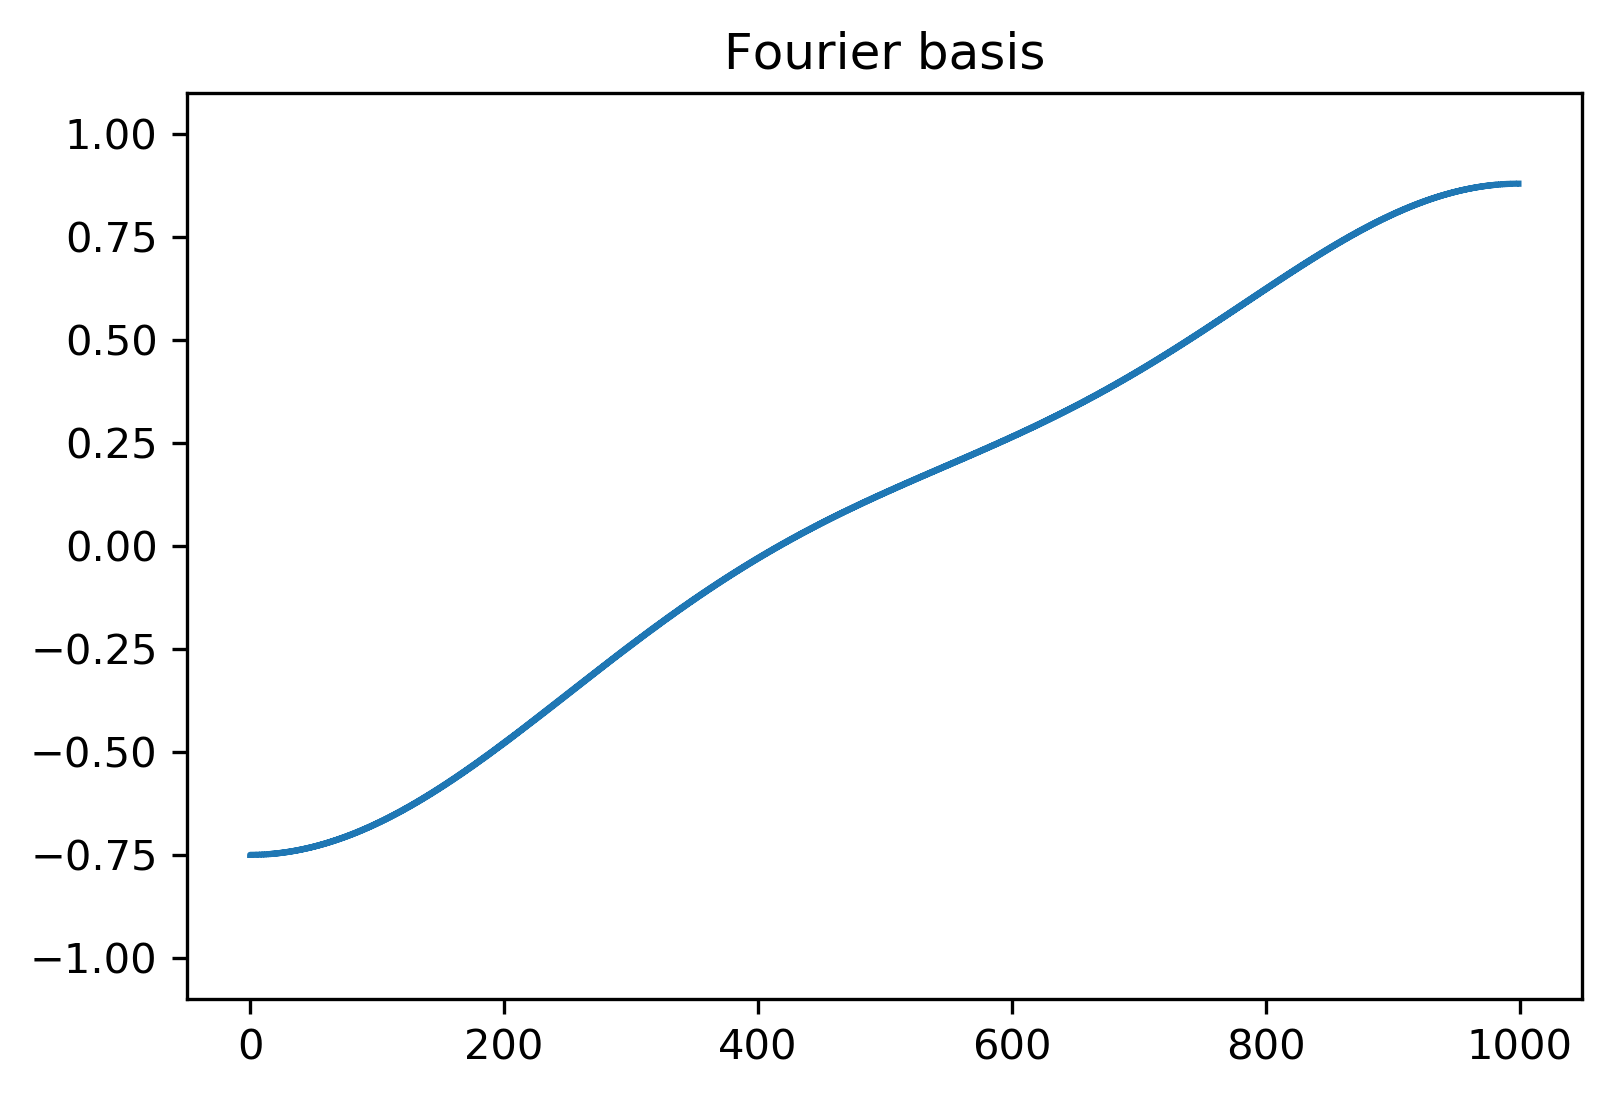

In [74]:
episode = 5000
alpha = 5e-5
N = 5

def poly(w, s):
    return np.array( [ np.cos(s*np.pi*i) for i in range(N+1) ] ).dot(w)

def grad_poly(s):
    return np.array([ np.cos(s*np.pi*i) for i in range(N+1) ])


w = np.zeros(N+1)
for i in range(episode):
    s = 499
    terminal = False
    # r_history = []
    s_history = []

    while not terminal:
        a = policy()
        new_s, r, terminal = step(s, a)
        s_history.append(s/1000.)
        s = new_s
    
    for s in s_history:
        w += alpha*( r - poly(w, s) )*grad_poly(s)

fig, ax = plt.subplots(dpi=300)
ax.step(np.arange(1000), [poly(w, s/1000.) for s in range(1000)], label=f'ep={episode}, a={alpha}')
ax.set_ylim([-1.1,1.1])
ax.set_title('Fourier basis')